# This notebook shows how to do SVM modeling using Iris dataset

In [51]:
import numpy as np
import pandas as pd
from sklearn import datasets
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

In [4]:
np.random.seed(42)

### Load Iris dataset

In [32]:
iris = datasets.load_iris()
X = iris.data
Y = iris.target
class_names = iris.target_names
X.shape, Y.shape, class_names

((150, 4), (150,), array(['setosa', 'versicolor', 'virginica'], dtype='<U10'))

In [13]:
iris_df = pd.DataFrame(X,columns=['sepal_length', 'sepal_width', 'petal_length', 'petal_width'])
iris_df['species'] = Y
iris_df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


### Data preprocessing

SVM models are very sensitive to the scale of the data and often do best when different features (independent variables) are rescaled/transformed into the same space

In [39]:
scaler = StandardScaler()
X_rescaled = scaler.fit_transform(X)

In [46]:
X_train, X_test, Y_train, Y_test = train_test_split(X_rescaled, Y, test_size=0.2, random_state=0)
X_train.shape, Y_train.shape, X_test.shape, Y_test.shape

((120, 4), (120,), (30, 4), (30,))

### Classification with linear SVM

In [53]:
model = LinearSVC(kernel='linear')
model.fit(X_train,Y_train)

print('Accuracy of linear SVC on training set: {:.2f}'.format(model.score(X_train, Y_train)))

print('Accuracy of linear SVC on test set: {:.2f}'.format(model.score(X_test, Y_test)))

Accuracy of linear SVC on training set: 0.94
Accuracy of linear SVC on test set: 0.97


Confusion matrix, without normalization
[[11  0  0]
 [ 0 13  0]
 [ 0  1  5]]
Normalized confusion matrix
[[1.   0.   0.  ]
 [0.   1.   0.  ]
 [0.   0.17 0.83]]


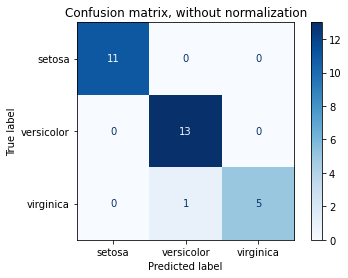

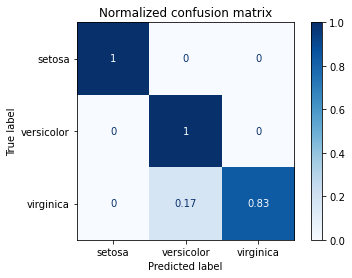

In [54]:
# this code is adopted from this example:
# https://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html

np.set_printoptions(precision=2)
titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(model, X_test, Y_test,
                                 display_labels=class_names,
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

### Classification with SVM with RBF kernel

In [47]:
model = SVC(C=100.0, kernel='rbf', degree=3, gamma='auto', coef0=0.0, shrinking=True, 
          probability=False, tol=0.001, cache_size=200, class_weight=None, 
          verbose=0, max_iter=-1, decision_function_shape="ovr", random_state = 0)
model.fit(X_train,Y_train)

print('Accuracy of SVC on training set: {:.2f}'.format(model.score(X_train, Y_train) * 100))

print('Accuracy of SVC on test set: {:.2f}'.format(model.score(X_test, Y_test) * 100))

Accuracy of SVC on training set: 98.33
Accuracy of SVC on test set: 100.00


Confusion matrix, without normalization
[[11  0  0]
 [ 0 13  0]
 [ 0  0  6]]
Normalized confusion matrix
[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]


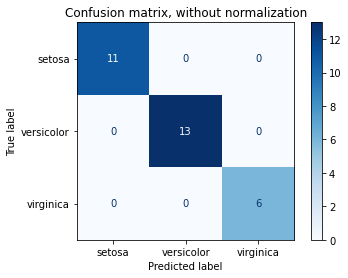

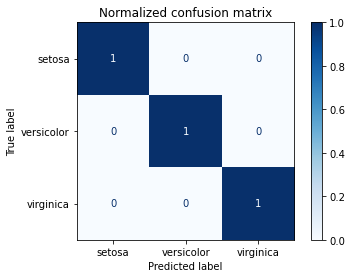

In [48]:
# this code is adopted from this example:
# https://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html

np.set_printoptions(precision=2)
titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(model, X_test, Y_test,
                                 display_labels=class_names,
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()